In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [47]:
start = '2010-01-01'
end = '2024-05-22'
stock = 'SBIN.NS'
data = yf.download(stock, start=start, end=end)
data.reset_index(inplace=True)
data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [48]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,227.500000,230.000000,227.500000,229.119995,192.488815,11031470
1,2010-01-05,230.800003,231.000000,228.009995,229.205002,192.560242,11613740
2,2010-01-06,229.699997,231.500000,228.500000,230.580002,193.715408,14527930
3,2010-01-07,230.600006,231.000000,228.110001,229.289993,192.631622,8576510
4,2010-01-08,229.399994,230.389999,228.009995,228.604996,192.056152,10453820
...,...,...,...,...,...,...,...
3542,2024-05-14,813.000000,822.400024,807.900024,818.200012,804.705383,10912462
3543,2024-05-15,821.000000,825.299988,818.049988,820.299988,806.770691,9755062
3544,2024-05-16,825.299988,826.150024,797.349976,811.950012,798.558472,20536990
3545,2024-05-17,814.500000,822.450012,811.200012,817.849976,804.361084,12492509


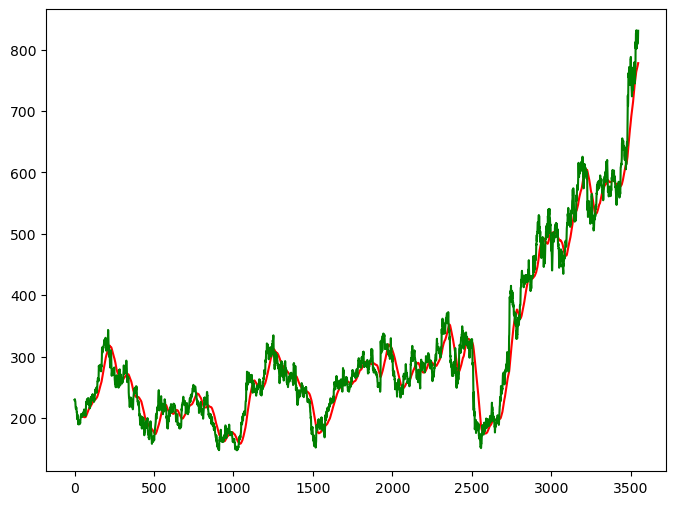

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

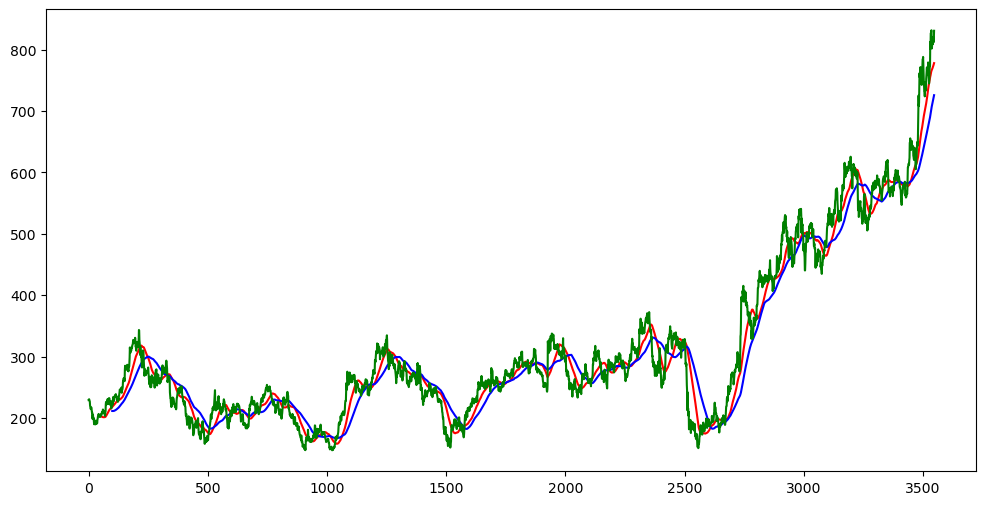

In [9]:
plt.figure(figsize=(12,6))
plt.plot(ma_50_days, 'r')

ma_100_days= data.Close.rolling(100).mean()
plt.plot(ma_100_days, 'b')

plt.plot(data.Close, 'g')
plt.show()

In [62]:

train_data = data['Close'][0:int(len(data)*0.80)]
test_data = data['Close'][int(len(data)*0.80):]

In [64]:
train_data.shape[0]

2837

In [65]:
test_data.shape[0]

710

In [66]:
from sklearn.preprocessing import MinMaxScaler
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

In [67]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [69]:
x_train = []
y_train = []

for i in range(100, len(train_data_scaled)):
    x_train.append(train_data_scaled[i-100:i])
    y_train.append(train_data_scaled[i, 0])

In [70]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [71]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [78]:

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



In [79]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [80]:
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - loss: 0.0410
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - loss: 0.0087
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - loss: 0.0074
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - loss: 0.0069
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - loss: 0.0062
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - loss: 0.0070
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - loss: 0.0058
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - loss: 0.0048
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - loss: 0.0046
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - loss: 0.0043
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - loss: 0.0044
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - loss: 0.0036
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - loss: 0.0036
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - loss: 0.0038
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [81]:
total_data = np.concatenate((train_data, test_data), axis=0)
inputs = total_data[len(total_data) - len(test_data) - 100:].reshape(-1, 1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(100, inputs.shape[0]):
    x_test.append(inputs[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [82]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step


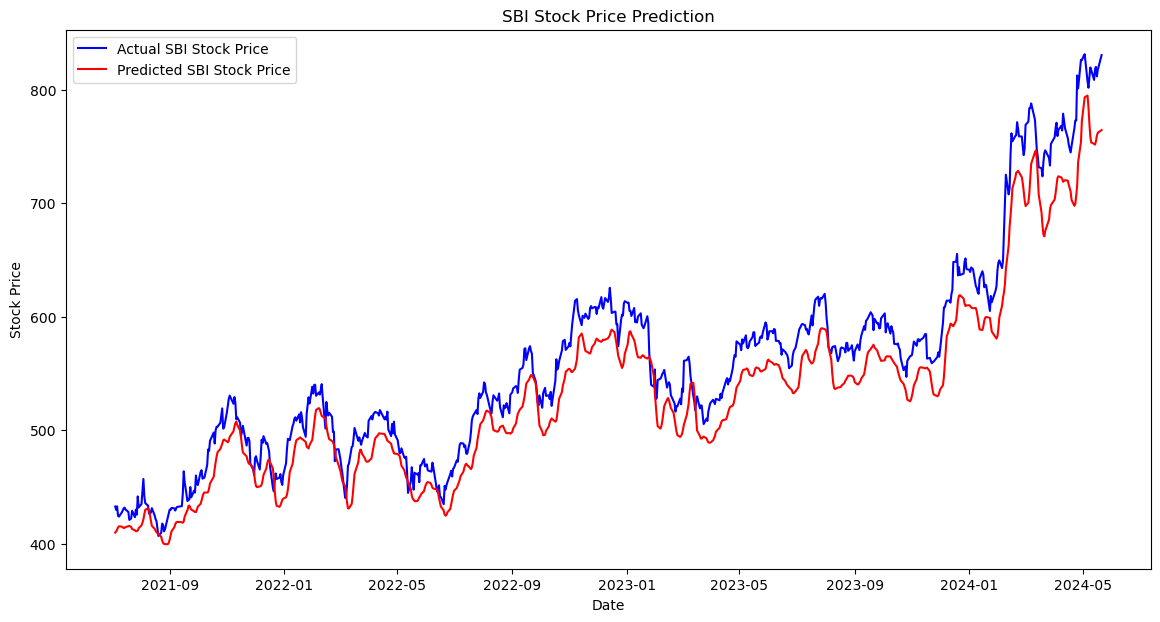

In [87]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][len(data) - len(test_data):], test_data, color='blue', label='Actual SBI Stock Price')
plt.plot(data['Date'][len(data) - len(test_data):], predicted_stock_price, color='red', label='Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()